In [1]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm 
from sklearn.utils import shuffle 
from collections import Counter 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
import keras
from keras.utils import to_categorical
import os
from keras.layers import *
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.models import Sequential, Model
from keras import optimizers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def parse_arff(filename):
	try:
		file = open(filename)
	except:
		print('file could not found or opened, try with file location')
	columns = []
	data = []

	for line in file:
		if line.startswith('@attribute'):
			line = line.strip()
			temp = line.split()
			columns.append(temp[1])
		elif line.startswith('@') or line.startswith('\n'):
			continue
		else:
			line = line.strip()
			temp = line.split(',')
			data.append(temp)

	return data,columns

In [3]:
data, columns = parse_arff('./Training Dataset.arff')
df = pd.DataFrame(data, columns = columns, dtype=np.int8)

In [4]:
x_train, x_test, y_train, y_test = train_test_split(df[df.columns[:-1]],df[df.columns[-1]], test_size = 0.3)

In [5]:
x_train = np.array(x_train).astype(np.int8)
y_train = np.array(y_train).astype(np.int8)
x_test = np.array(x_test).astype(np.int8)
y_test = np.array(y_test).astype(np.int8)
y_train = np.where(y_train == -1, 0, y_train)
y_test = np.where(y_test == -1, 0, y_test)

In [6]:
loss_fn = keras.losses.Huber(delta=1.0)
activation = ['softplus', 'softsign', 'selu', 'elu', 'exponential', 'tanh', 'sigmoid', 'relu']
optimizers = ['sgd', 'rmsprop', 'adam', 'adadelta', 'adagrad', 'adamax', 'nadam', 'ftrl']
binary_loss = ['binary_crossentropy', 'hinge', 'squared_hinge', loss_fn]

In [12]:
x = x_train.reshape((x_train.shape[0], 1, 30))
xx = x_test.reshape((x_test.shape[0], 1, 30))

In [38]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softplus'))

In [42]:
softplus_train = []
softplus_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        softplus_train.append(modelhistory.history['accuracy'])
        softplus_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 3s 11ms/step - loss: 0.1303 - accuracy: 0.9435 - val_loss: 0.1535 - val_accuracy: 0.9424
Epoch 2/20
242/242 [==============================] - 2s 7ms/step - loss: 0.1649 - accuracy: 0.9342 - val_loss: 0.1545 - val_accuracy: 0.9406
Epoch 3/20
242/242 [==============================] - 2s 8ms/step - loss: 0.1335 - accuracy: 0.9452 - val_loss: 0.1554 - val_accuracy: 0.9400
Epoch 4/20
242/242 [==============================] - 2s 7ms/step - loss: 0.1297 - accuracy: 0.9438 - val_loss: 0.1576 - val_accuracy: 0.9382
Epoch 5/20
242/242 [==============================] - 2s 6ms/step - loss: 0.1349 - accuracy: 0.9403 - val_loss: 0.1735 - val_accuracy: 0.9304
Epoch 6/20
242/242 [==============================] - 2s 8ms/step - loss: 0.1257 - accuracy: 0.9439 - val_loss: 0.1559 - val_accuracy: 0.9394
Epoch 7/20
242/242 [==============================] - 2s 8ms/step - loss: 0.1266 - accuracy: 0.9461 - val_loss: 0.1786 - val_accuracy: 0.9385
Epoch

In [44]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='softsign'))

In [45]:
softsign_train = []
softsign_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        softsign_train.append(modelhistory.history['accuracy'])
        softsign_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 3s 11ms/step - loss: 0.7336 - accuracy: 0.5535 - val_loss: 0.6946 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 1s 6ms/step - loss: 0.6951 - accuracy: 0.5540 - val_loss: 0.6868 - val_accuracy: 0.5638
Epoch 3/20
242/242 [==============================] - 1s 5ms/step - loss: 0.6894 - accuracy: 0.5540 - val_loss: 0.6847 - val_accuracy: 0.5638
Epoch 4/20
242/242 [==============================] - 1s 5ms/step - loss: 0.6873 - accuracy: 0.5540 - val_loss: 0.6841 - val_accuracy: 0.5638
Epoch 5/20
242/242 [==============================] - 1s 5ms/step - loss: 0.6866 - accuracy: 0.5540 - val_loss: 0.6839 - val_accuracy: 0.5638
Epoch 6/20
242/242 [==============================] - 1s 5ms/step - loss: 0.6860 - accuracy: 0.5540 - val_loss: 0.6837 - val_accuracy: 0.5638
Epoch 7/20
242/242 [==============================] - 1s 5ms/step - loss: 0.6859 - accuracy: 0.5540 - val_loss: 0.6835 - val_accuracy: 0.5638
Epoch

In [46]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='selu'))

In [47]:
selu_train = []
selu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        selu_train.append(modelhistory.history['accuracy'])
        selu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 5s 20ms/step - loss: 6.7965 - accuracy: 0.5522 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 4s 16ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 3/20
242/242 [==============================] - 4s 15ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 4/20
242/242 [==============================] - 3s 14ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 5/20
242/242 [==============================] - 3s 14ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 6/20
242/242 [==============================] - 4s 15ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638loss: 6.7912 - accuracy: 
Epoch 7/20
242/242 [==============================] - 4s 15ms/step - loss: 6.7993 - accuracy: 0.5540 - val_loss: 6.65

In [48]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='elu'))

In [49]:
elu_train = []
elu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        elu_train.append(modelhistory.history['accuracy'])
        elu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 4s 18ms/step - loss: 6.8014 - accuracy: 0.5532 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 3s 13ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 3/20
242/242 [==============================] - 3s 13ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 4/20
242/242 [==============================] - 3s 14ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 5/20
242/242 [==============================] - 3s 13ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 6/20
242/242 [==============================] - 3s 13ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 7/20
242/242 [==============================] - 3s 13ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638

In [50]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='exponential'))

In [51]:
exp_train = []
exp_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        exp_train.append(modelhistory.history['accuracy'])
        exp_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 5s 19ms/step - loss: 1.0863 - accuracy: 0.4822 - val_loss: 0.6905 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 4s 18ms/step - loss: 0.7211 - accuracy: 0.5049 - val_loss: 0.6893 - val_accuracy: 0.5638
Epoch 3/20
242/242 [==============================] - 5s 19ms/step - loss: 0.7093 - accuracy: 0.5101 - val_loss: 0.6816 - val_accuracy: 0.5638
Epoch 4/20
242/242 [==============================] - 4s 17ms/step - loss: 0.7031 - accuracy: 0.5171 - val_loss: 0.6834 - val_accuracy: 0.5638
Epoch 5/20
242/242 [==============================] - 4s 17ms/step - loss: 0.6976 - accuracy: 0.5248 - val_loss: 0.6779 - val_accuracy: 0.5638
Epoch 6/20
242/242 [==============================] - 4s 17ms/step - loss: 0.6899 - accuracy: 0.5342 - val_loss: 0.6727 - val_accuracy: 0.5638
Epoch 7/20
242/242 [==============================] - 4s 18ms/step - loss: 0.6836 - accuracy: 0.5532 - val_loss: 0.6656 - val_accuracy: 0.5638

In [52]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='tanh'))

In [53]:
tanh_train = []
tanh_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        tanh_train.append(modelhistory.history['accuracy'])
        tanh_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 5s 21ms/step - loss: 0.7013 - accuracy: 0.5514 - val_loss: 0.6762 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 5s 19ms/step - loss: 0.6767 - accuracy: 0.5682 - val_loss: 0.6687 - val_accuracy: 0.5671
Epoch 3/20
242/242 [==============================] - 5s 19ms/step - loss: 0.6620 - accuracy: 0.6122 - val_loss: 0.6475 - val_accuracy: 0.6156
Epoch 4/20
242/242 [==============================] - 5s 21ms/step - loss: 0.6239 - accuracy: 0.7448 - val_loss: 0.5825 - val_accuracy: 0.8086
Epoch 5/20
242/242 [==============================] - 4s 19ms/step - loss: 0.4892 - accuracy: 0.8571 - val_loss: 0.4411 - val_accuracy: 0.8830
Epoch 6/20
242/242 [==============================] - 5s 19ms/step - loss: 0.3428 - accuracy: 0.8952 - val_loss: 0.3606 - val_accuracy: 0.9150
Epoch 7/20
242/242 [==============================] - 5s 19ms/step - loss: 0.3035 - accuracy: 0.9032 - val_loss: 0.2683 - val_accuracy: 0.9141

In [54]:
softplus = np.array(softplus_train)
softplusv = np.array(softplus_val)
softsign = np.array(softsign_train)
softsignv = np.array(softsign_val)
selu = np.array(selu_train)
seluv = np.array(selu_val)
elu = np.array(elu_train)
eluv = np.array(elu_val)
exp = np.array(exp_train)
expv = np.array(exp_val)
tanh = np.array(tanh_train)
tanhv = np.array(tanh_val)

In [57]:
binary = 'b_cros','hinge','sq_hinge', 'huber'

In [58]:
softplus_comb = []

for opt in optimizers:
    for loss in binary:
        softplus_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(softplus.shape[0]):
  best_accuracy_train.append(np.max(softplus[i]))
  last_accuracy_train.append(softplus[i,-1])
  best_accuracy_val.append(np.max(softplusv[i]))
  last_accuracy_val.append(softplusv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

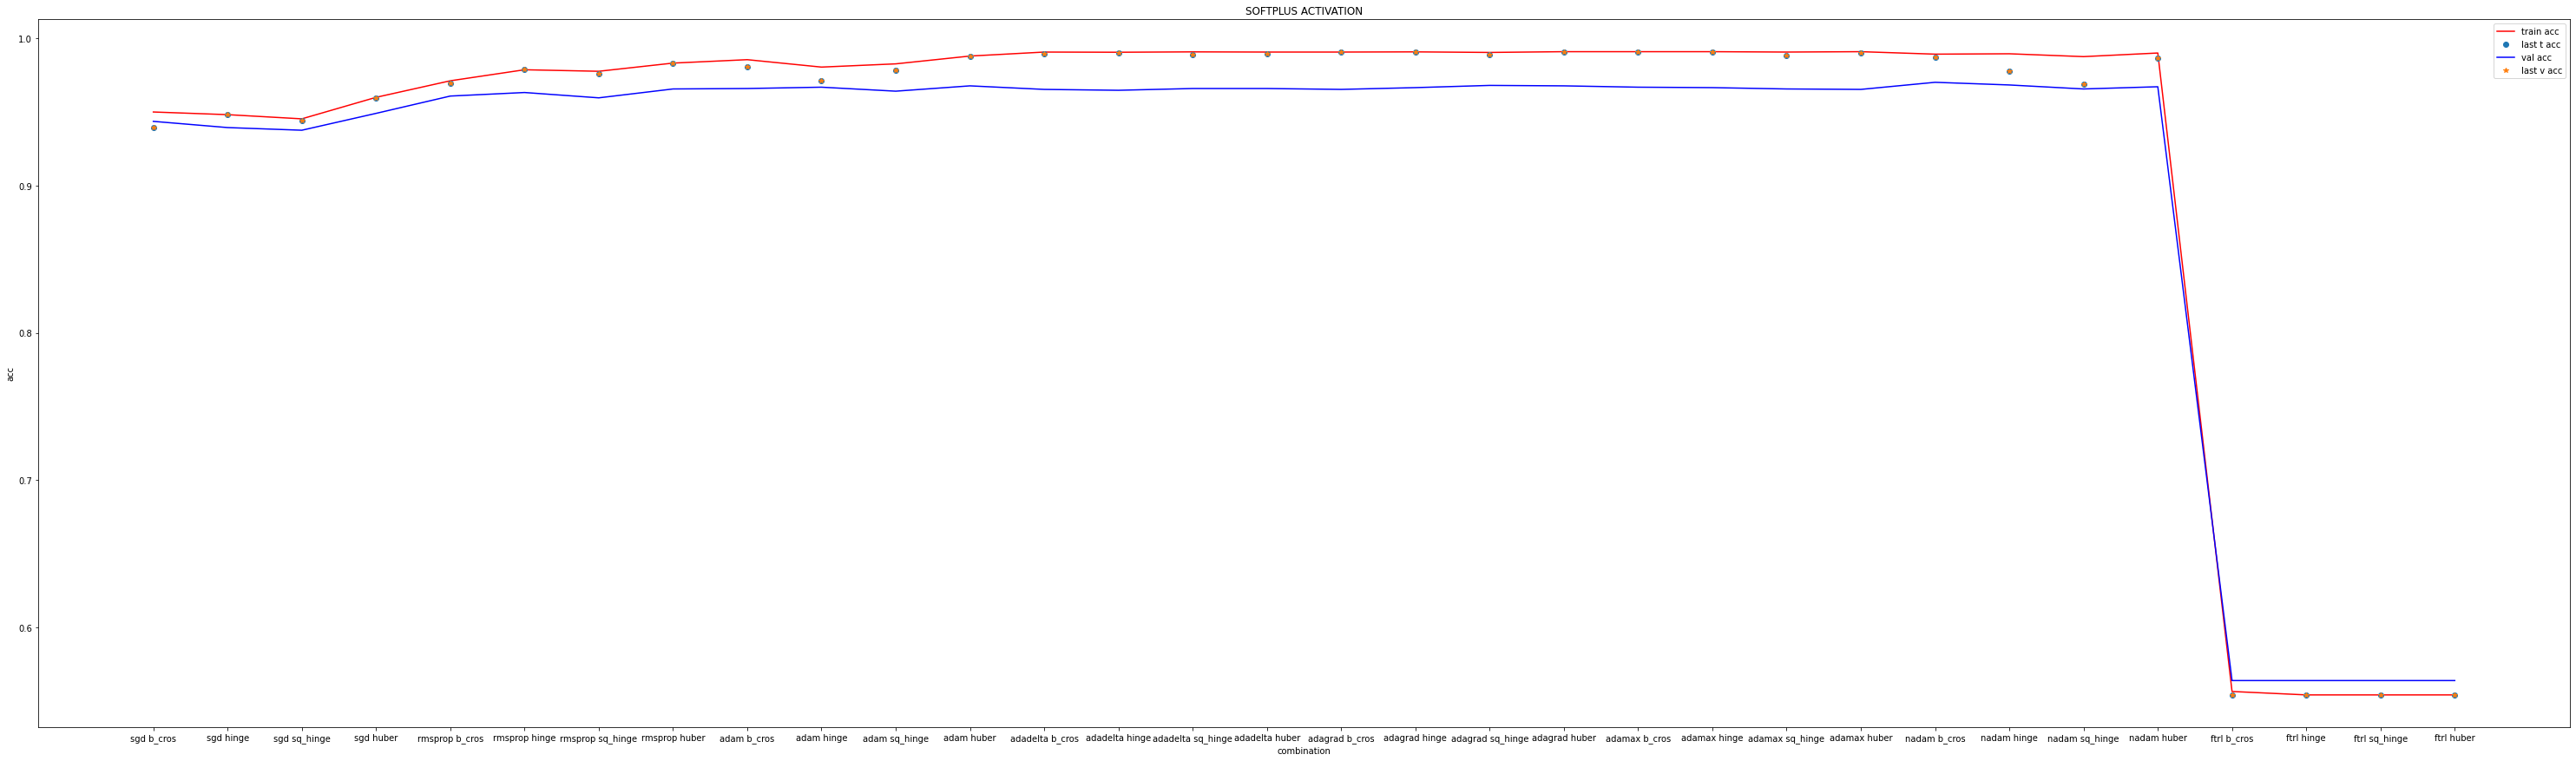

In [59]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(softplus_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(softplus_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(softplus_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(softplus_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SOFTPLUS ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [60]:
softsign_comb = []

for opt in optimizers:
    for loss in binary:
        softsign_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(softsign.shape[0]):
  best_accuracy_train.append(np.max(softsign[i]))
  last_accuracy_train.append(softsign[i,-1])
  best_accuracy_val.append(np.max(softsignv[i]))
  last_accuracy_val.append(softsignv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

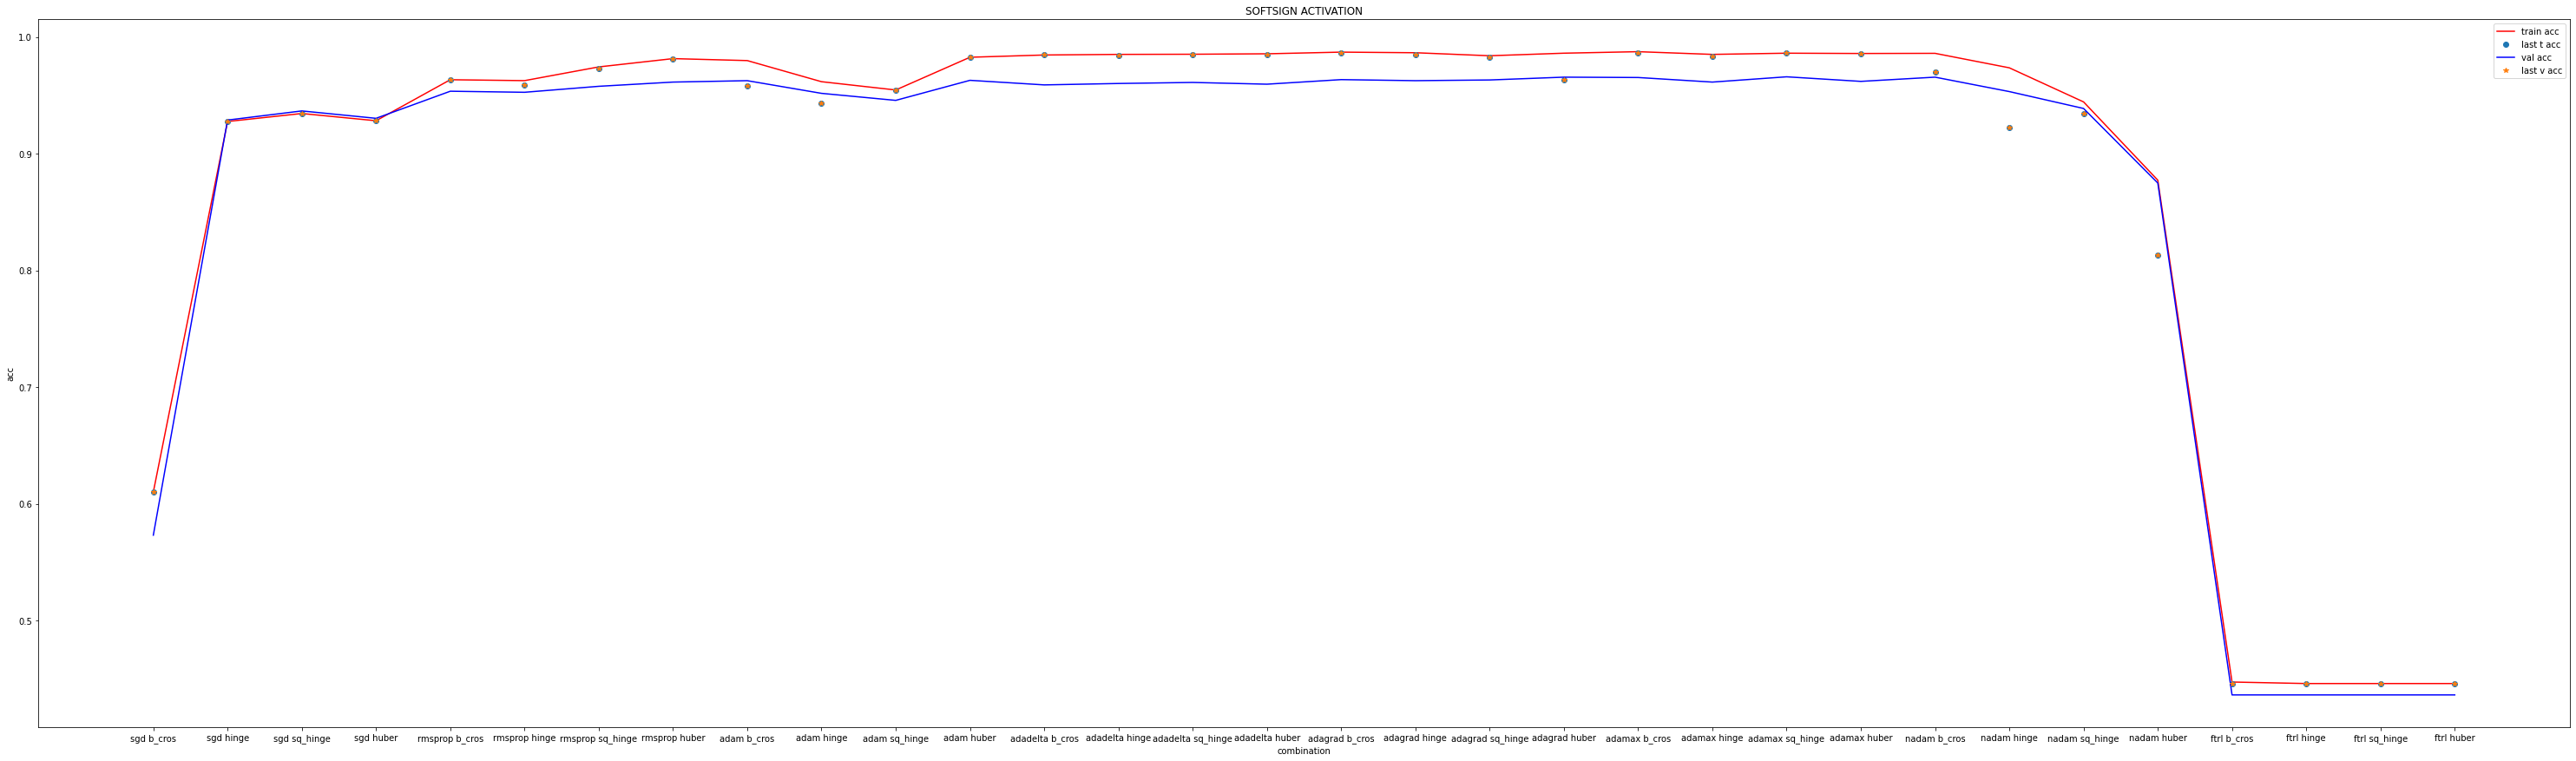

In [61]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(softplus_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(softplus_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(softplus_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(softplus_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SOFTSIGN ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [62]:
selu_comb = []

for opt in optimizers:
    for loss in binary:
        selu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(selu.shape[0]):
  best_accuracy_train.append(np.max(selu[i]))
  last_accuracy_train.append(selu[i,-1])
  best_accuracy_val.append(np.max(seluv[i]))
  last_accuracy_val.append(seluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

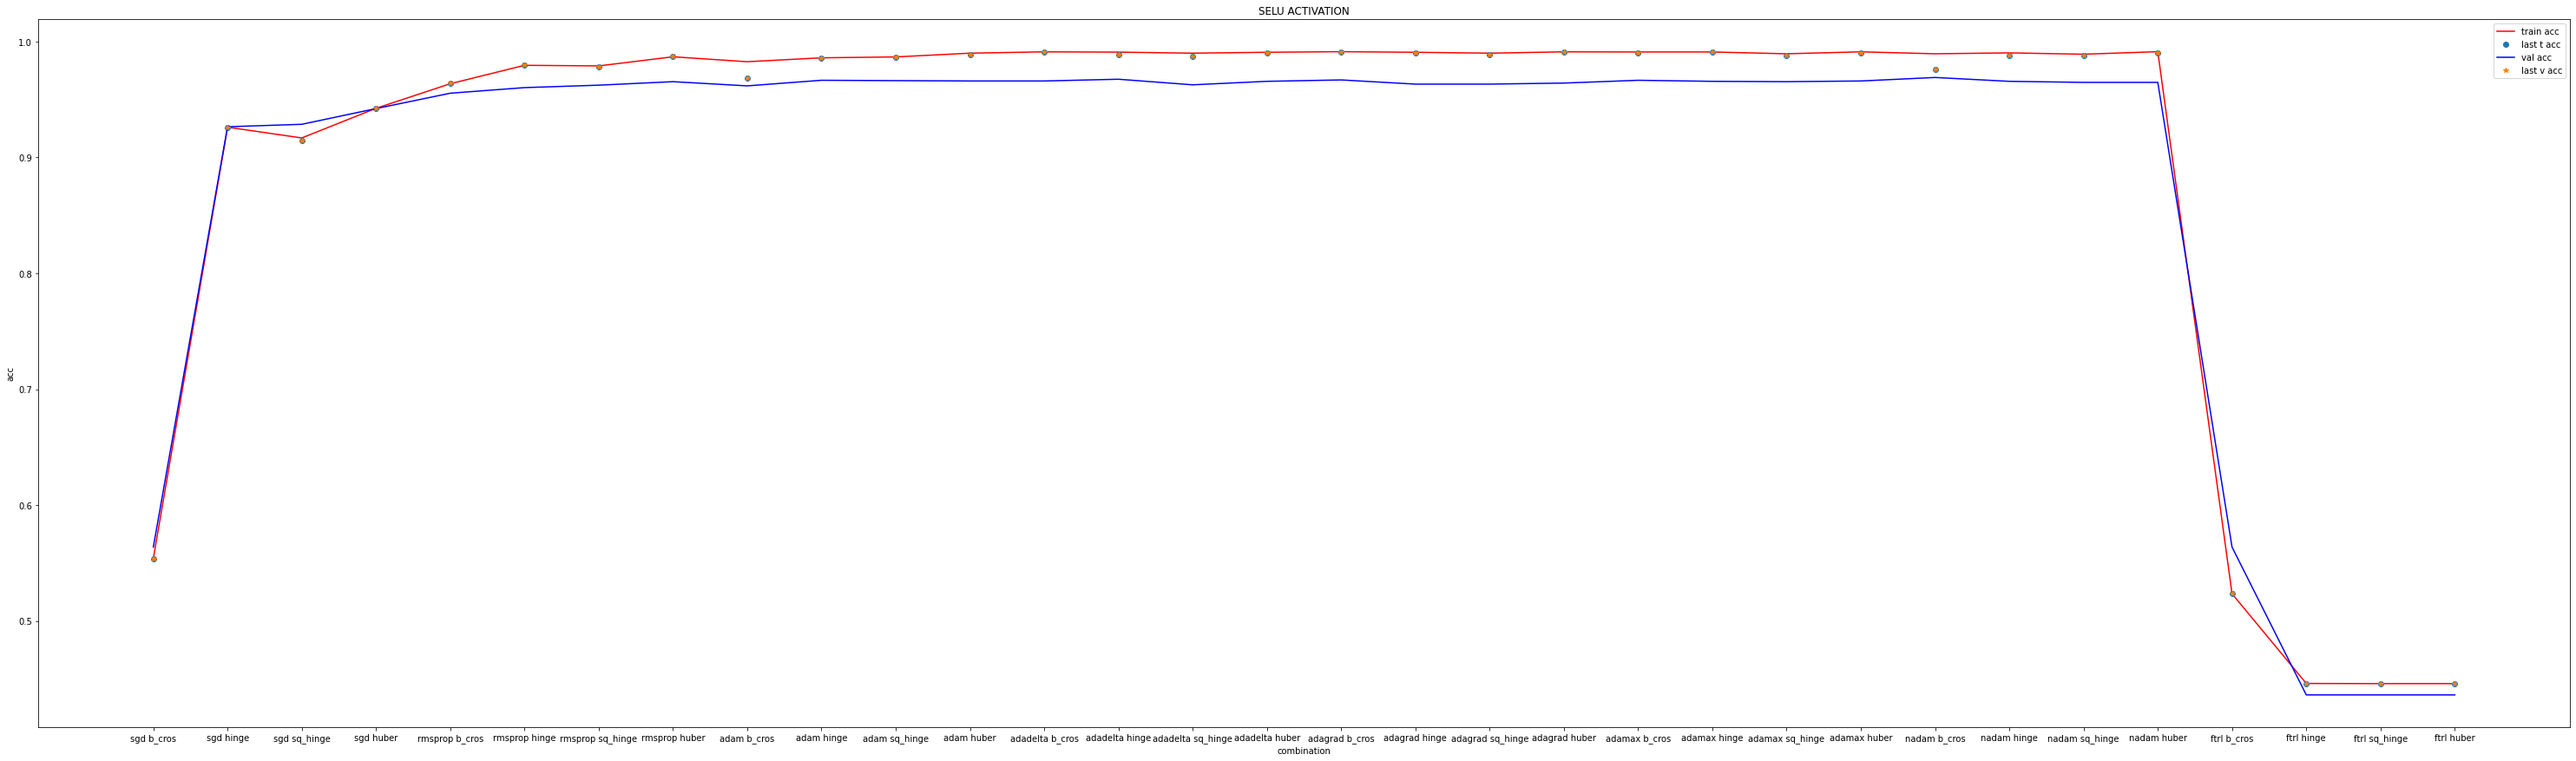

In [63]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(selu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(selu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(selu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(selu_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [64]:
elu_comb = []

for opt in optimizers:
    for loss in binary:
        elu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(elu.shape[0]):
  best_accuracy_train.append(np.max(elu[i]))
  last_accuracy_train.append(elu[i,-1])
  best_accuracy_val.append(np.max(eluv[i]))
  last_accuracy_val.append(eluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

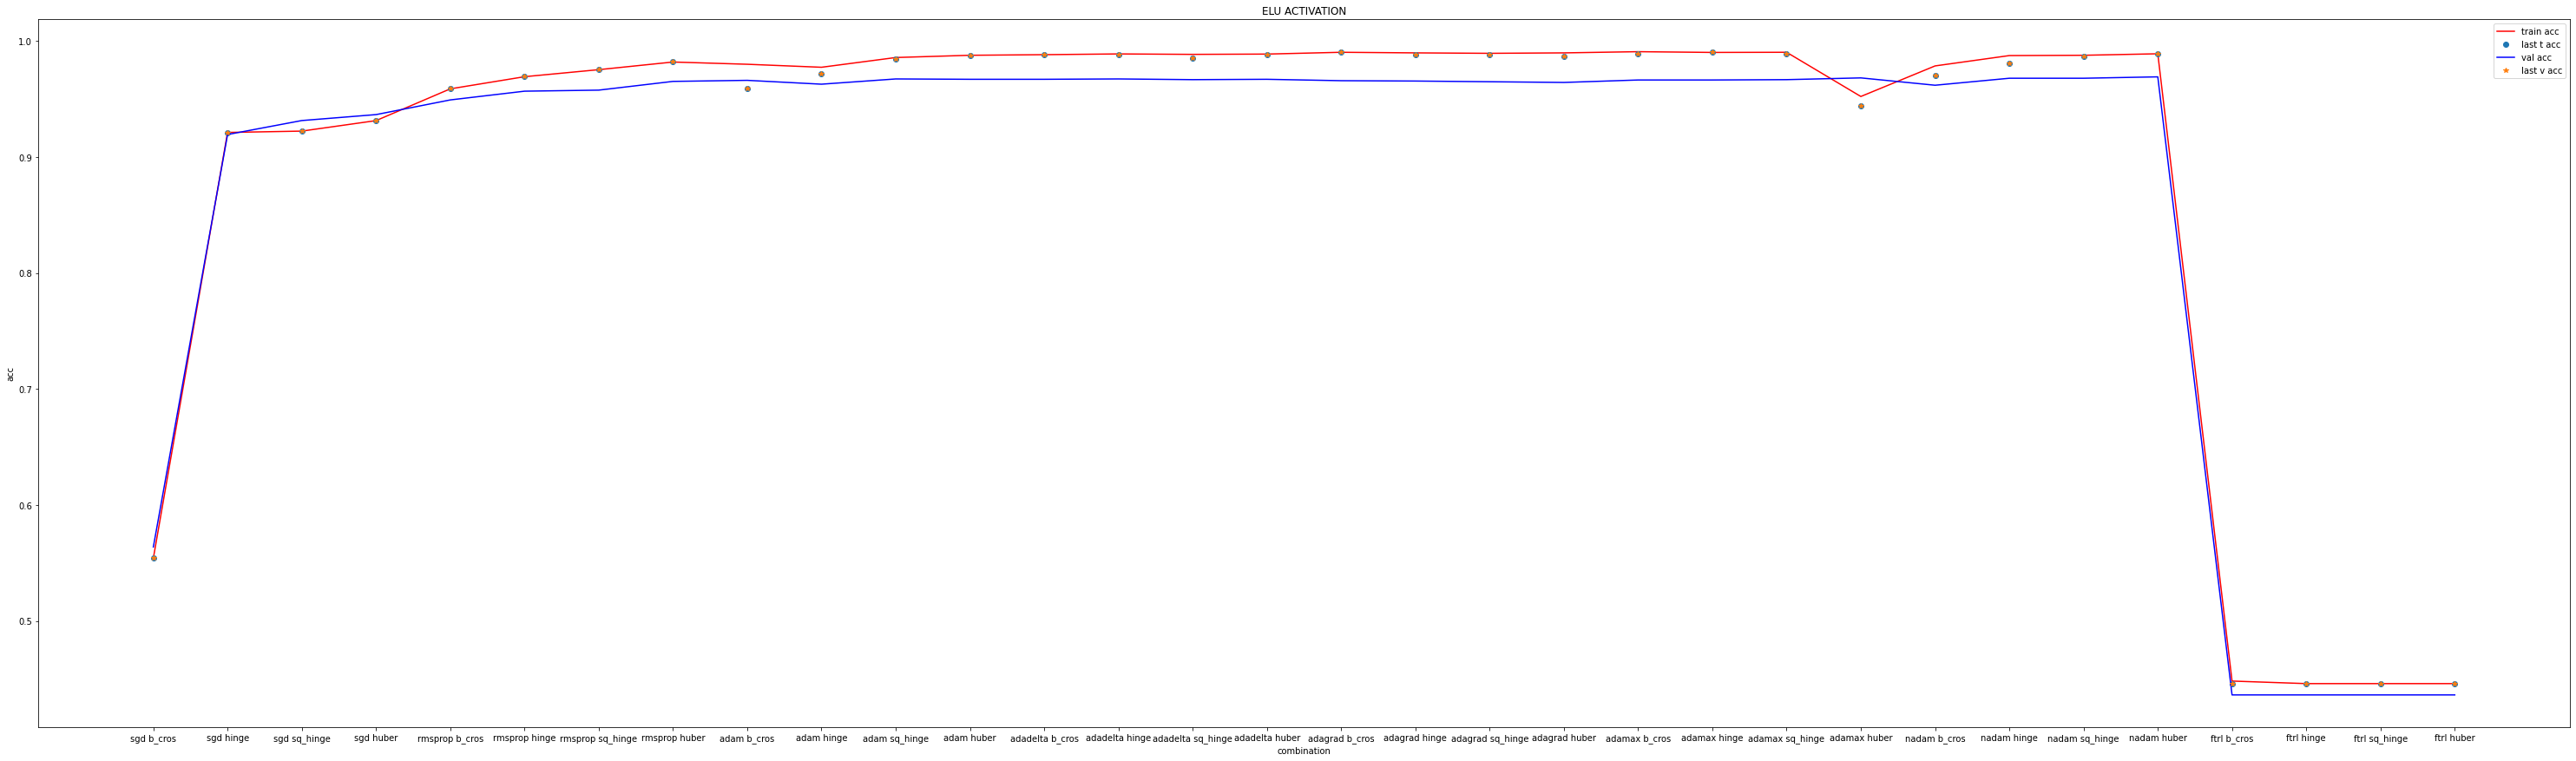

In [65]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(elu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(elu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(elu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(elu_comb, last_accuracy_train, '*', label='last v acc')
plt.title('ELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [66]:
exp_comb = []

for opt in optimizers:
    for loss in binary:
        exp_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(exp.shape[0]):
  best_accuracy_train.append(np.max(exp[i]))
  last_accuracy_train.append(exp[i,-1])
  best_accuracy_val.append(np.max(expv[i]))
  last_accuracy_val.append(expv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

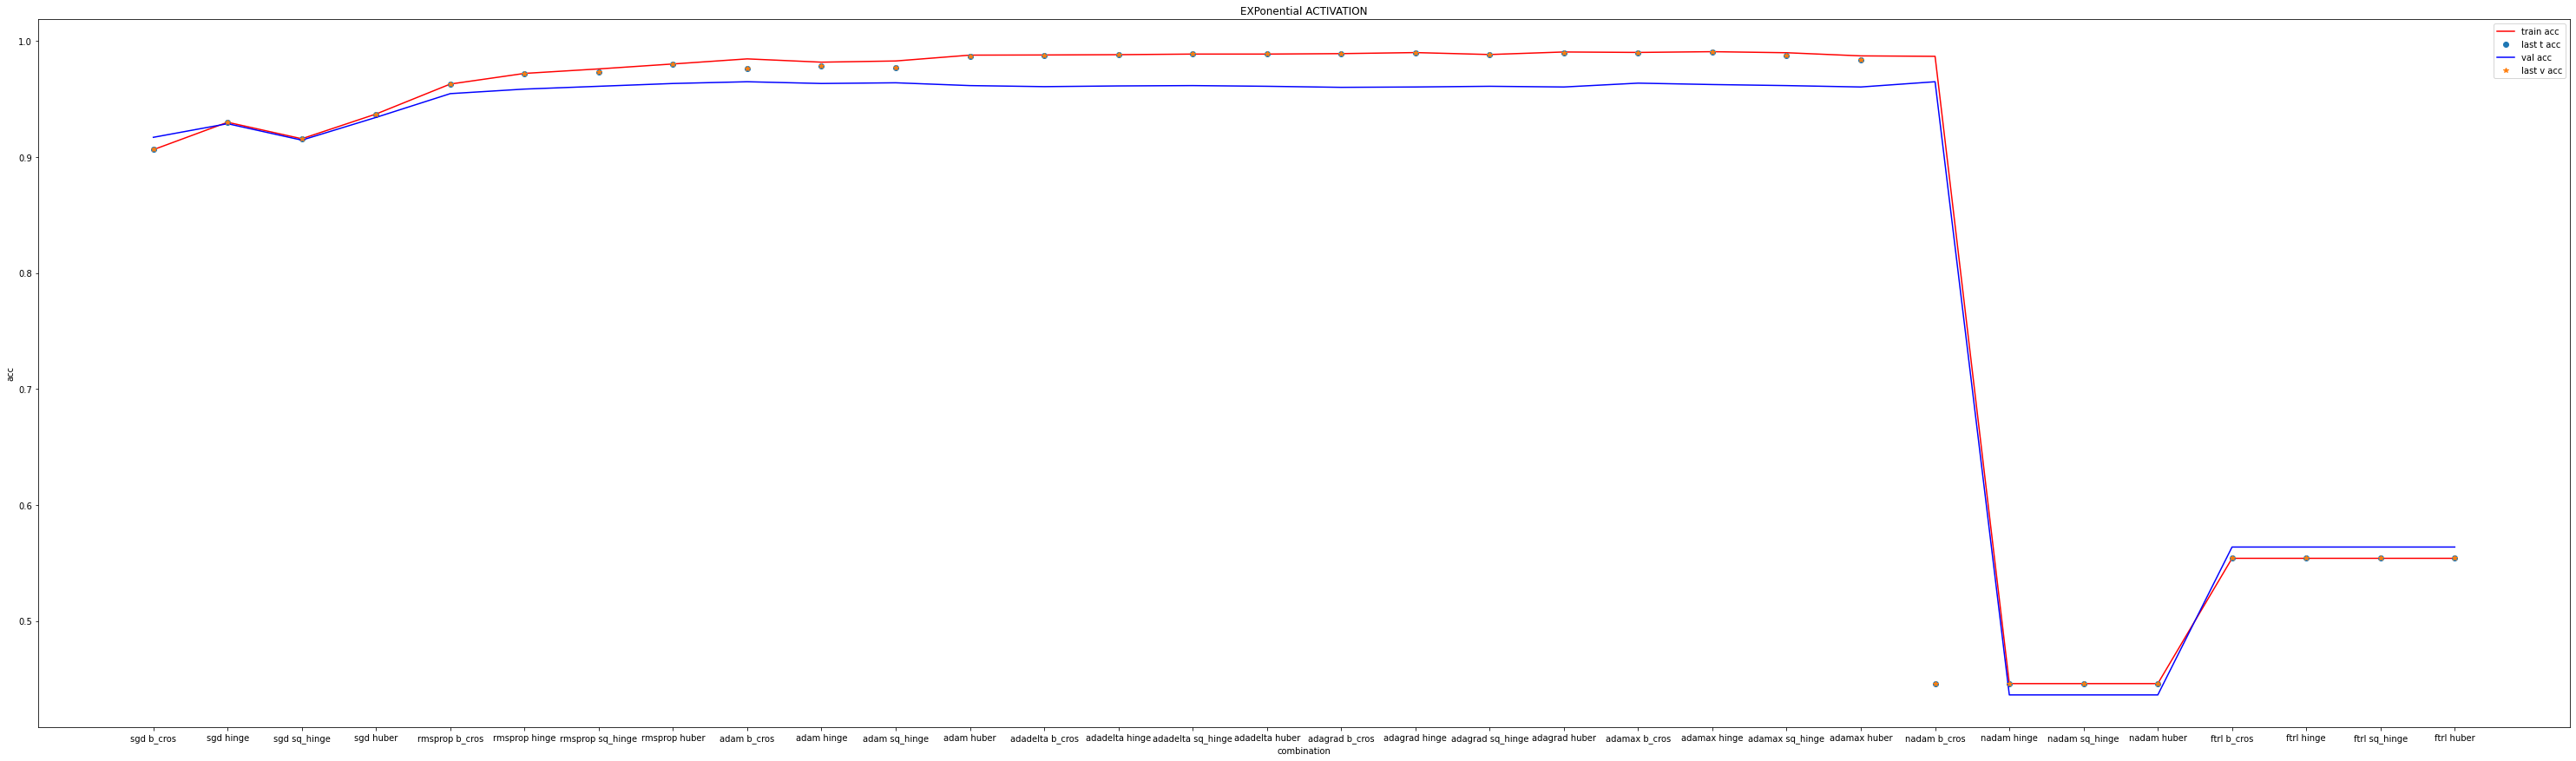

In [67]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(exp_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(exp_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(exp_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(exp_comb, last_accuracy_train, '*', label='last v acc')
plt.title('EXPonential ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [68]:
tanh_comb = []

for opt in optimizers:
    for loss in binary:
        tanh_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(tanh.shape[0]):
  best_accuracy_train.append(np.max(tanh[i]))
  last_accuracy_train.append(tanh[i,-1])
  best_accuracy_val.append(np.max(tanhv[i]))
  last_accuracy_val.append(tanhv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

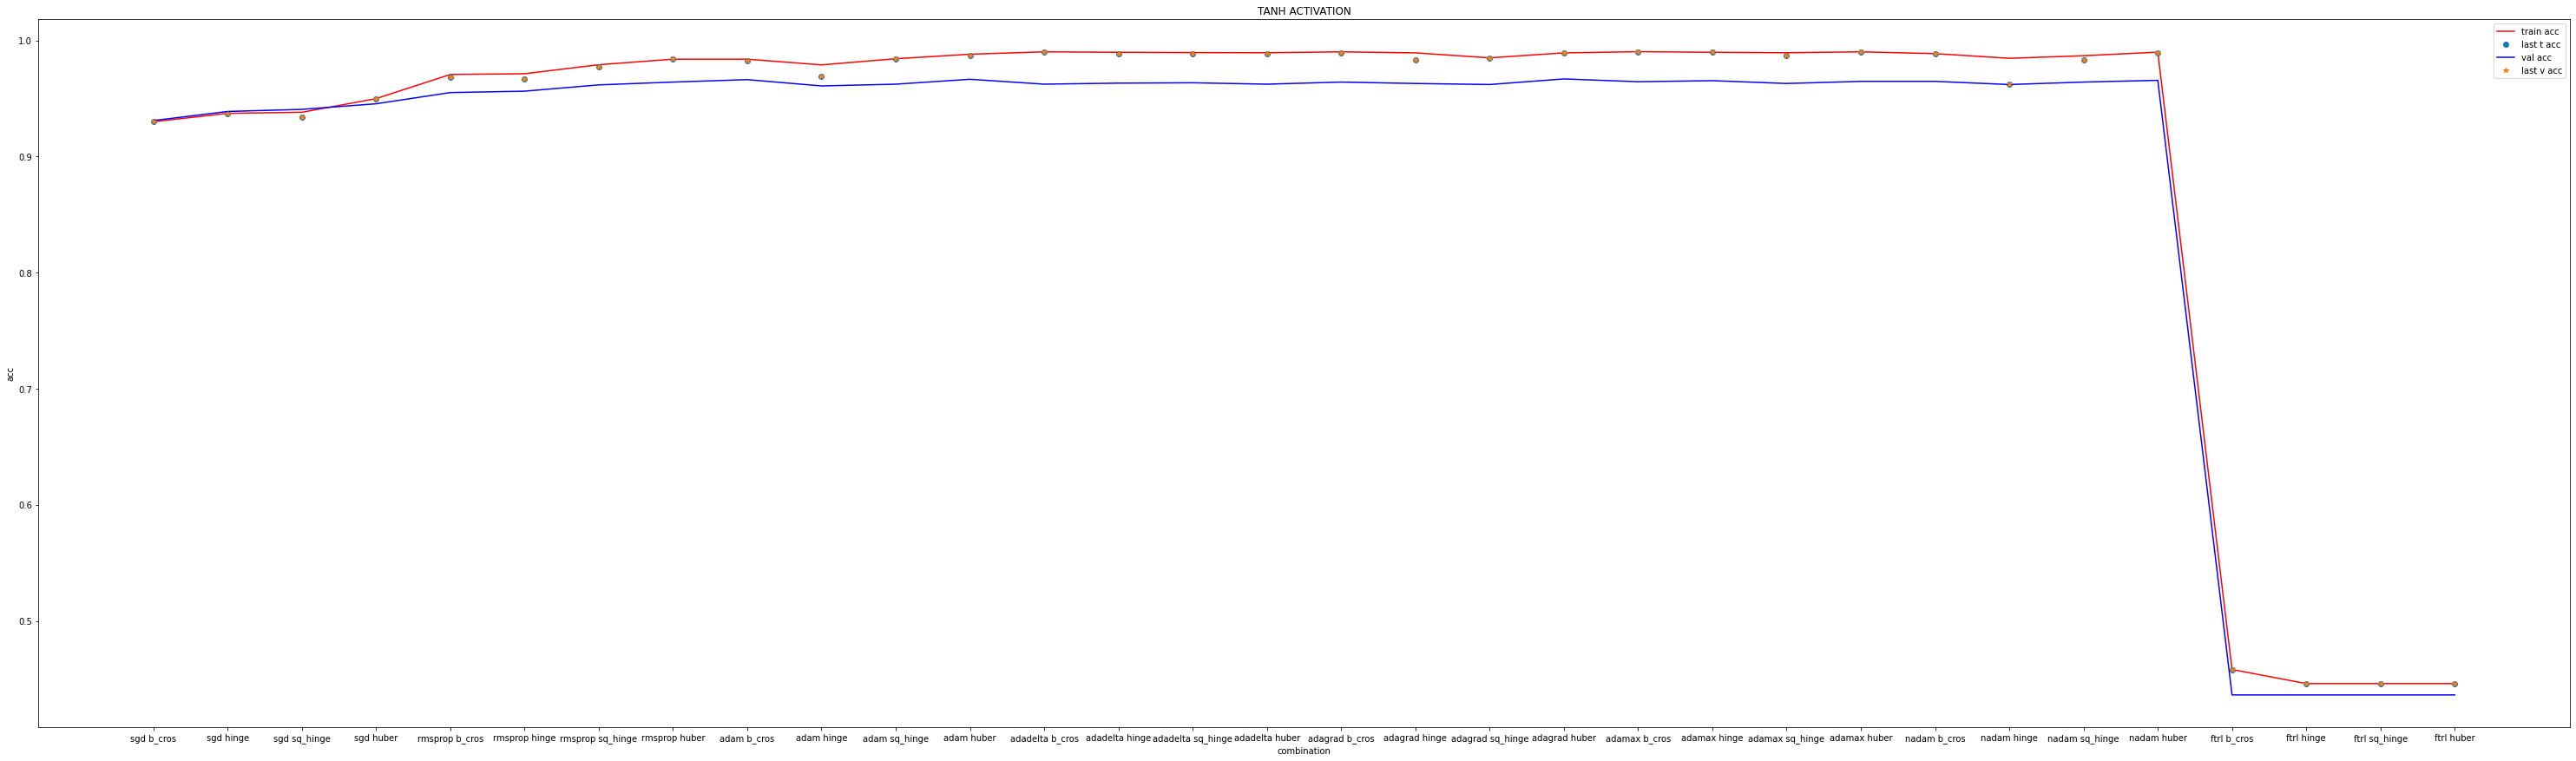

In [69]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(tanh_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(tanh_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(tanh_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(tanh_comb, last_accuracy_train, '*', label='last v acc')
plt.title('TANH ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [70]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [71]:
sigmoid_train = []
sigmoid_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        sigmoid_train.append(modelhistory.history['accuracy'])
        sigmoid_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 8s 35ms/step - loss: 0.6875 - accuracy: 0.5538 - val_loss: 0.6832 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 7s 28ms/step - loss: 0.6830 - accuracy: 0.5540 - val_loss: 0.6799 - val_accuracy: 0.5638
Epoch 3/20
242/242 [==============================] - 7s 29ms/step - loss: 0.6802 - accuracy: 0.5540 - val_loss: 0.6770 - val_accuracy: 0.5638
Epoch 4/20
242/242 [==============================] - 7s 31ms/step - loss: 0.6771 - accuracy: 0.5540 - val_loss: 0.6731 - val_accuracy: 0.5638
Epoch 5/20
242/242 [==============================] - 8s 33ms/step - loss: 0.6725 - accuracy: 0.5540 - val_loss: 0.6675 - val_accuracy: 0.5638
Epoch 6/20
242/242 [==============================] - 8s 35ms/step - loss: 0.6649 - accuracy: 0.5543 - val_loss: 0.6581 - val_accuracy: 0.5638
Epoch 7/20
242/242 [==============================] - 7s 28ms/step - loss: 0.6519 - accuracy: 0.5896 - val_loss: 0.6412 - val_accuracy: 0.6156

In [72]:
model = keras.Sequential()
model.add(keras.layers.LSTM(64, activation='relu',return_sequences=True, input_shape=(1,30)))
model.add(keras.layers.LSTM(128, activation='relu'))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(64 ,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='relu'))

In [73]:
relu_train = []
relu_val = []

for opt in optimizers:
    for loss in binary_loss:
        model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])
        modelhistory = model.fit(x, y_train, epochs = 20, validation_data=(xx, y_test))
        relu_train.append(modelhistory.history['accuracy'])
        relu_val.append(modelhistory.history['val_accuracy'])

Epoch 1/20
242/242 [==============================] - 6s 25ms/step - loss: 6.7676 - accuracy: 0.5553 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 2/20
242/242 [==============================] - 6s 23ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 3/20
242/242 [==============================] - 6s 25ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 4/20
242/242 [==============================] - 6s 25ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 5/20
242/242 [==============================] - 6s 24ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 6/20
242/242 [==============================] - 6s 23ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638
Epoch 7/20
242/242 [==============================] - 6s 24ms/step - loss: 6.8009 - accuracy: 0.5540 - val_loss: 6.6523 - val_accuracy: 0.5638

In [74]:
sigmoid = np.array(sigmoid_train)
sigmoidv = np.array(sigmoid_val)
relu = np.array(relu_train)
reluv = np.array(relu_val)

In [75]:
sigmoid_comb = []

for opt in optimizers:
    for loss in binary:
        sigmoid_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(sigmoid.shape[0]):
  best_accuracy_train.append(np.max(sigmoid[i]))
  last_accuracy_train.append(sigmoid[i,-1])
  best_accuracy_val.append(np.max(sigmoidv[i]))
  last_accuracy_val.append(sigmoidv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

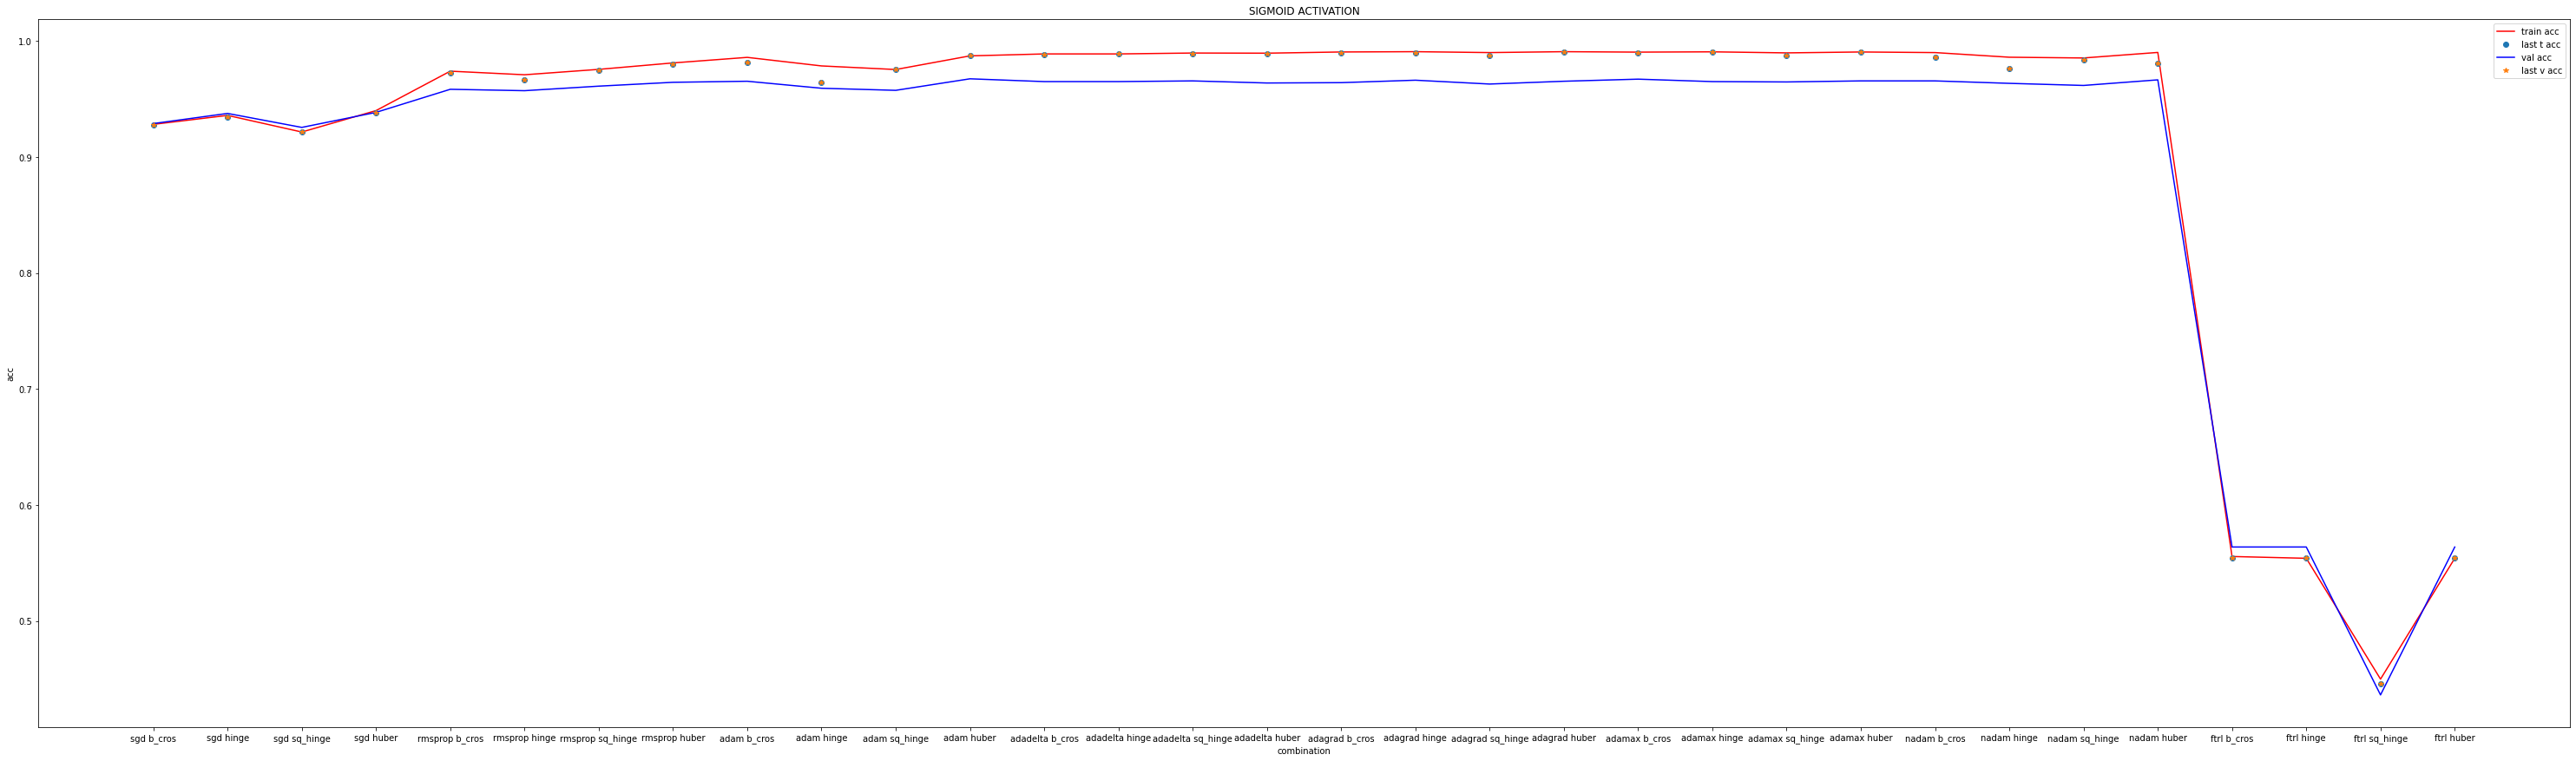

In [76]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(sigmoid_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(sigmoid_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(sigmoid_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(sigmoid_comb, last_accuracy_train, '*', label='last v acc')
plt.title('SIGMOID ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [77]:
relu_comb = []

for opt in optimizers:
    for loss in binary:
        relu_comb.append(opt + ' ' + loss)

best_accuracy_train = []
last_accuracy_train = []
best_accuracy_val = []
last_accuracy_val = []

for i in range(relu.shape[0]):
  best_accuracy_train.append(np.max(relu[i]))
  last_accuracy_train.append(relu[i,-1])
  best_accuracy_val.append(np.max(reluv[i]))
  last_accuracy_val.append(reluv[i,-1])

best_accuracy_train = np.array(best_accuracy_train)
last_accuracy_train = np.array(last_accuracy_train)
best_accuracy_val = np.array(best_accuracy_val)
last_accuracy_val = np.array(last_accuracy_val)

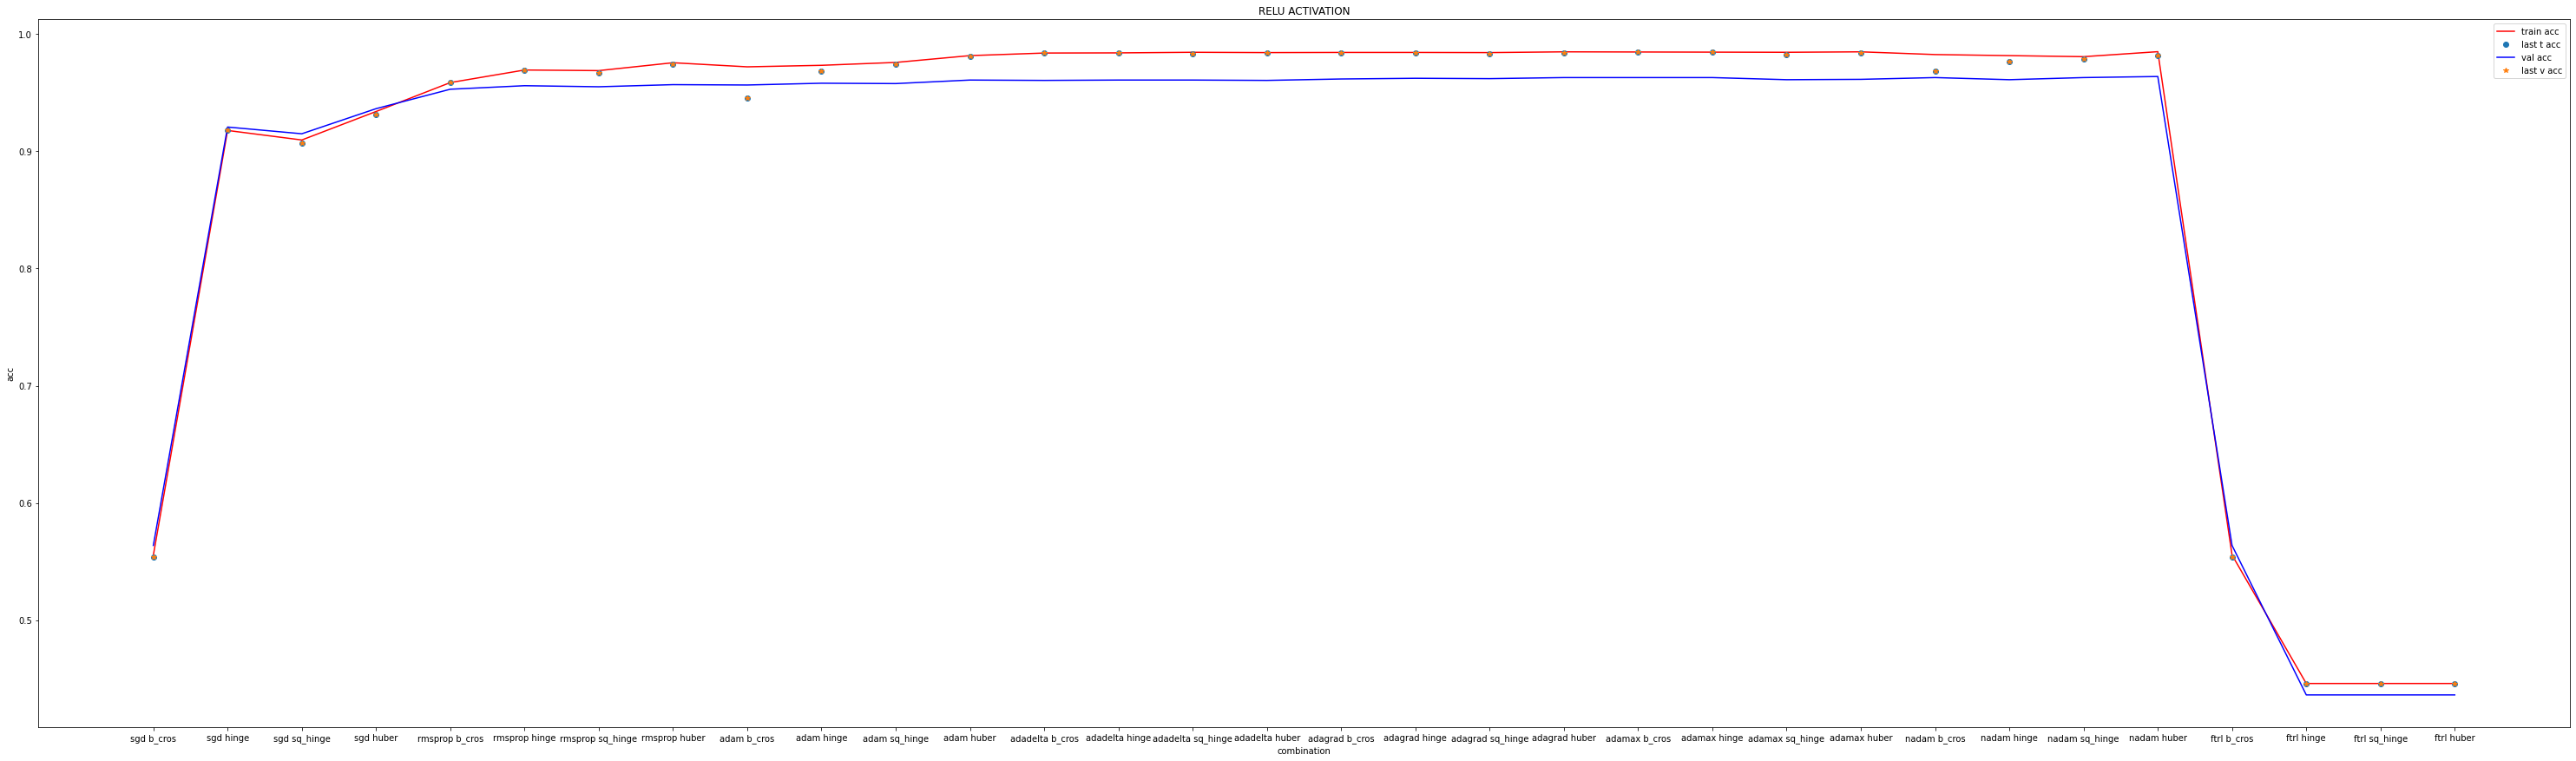

In [78]:
plt.figure(figsize=(115, 15))
plt.subplot(1,2,1) 
plt.plot(relu_comb, best_accuracy_train, 'r', label='train acc')
plt.plot(relu_comb, last_accuracy_train, 'o', label='last t acc')
plt.plot(relu_comb, best_accuracy_val, 'b', label='val acc')
plt.plot(relu_comb, last_accuracy_train, '*', label='last v acc')
plt.title('RELU ACTIVATION')
plt.xlabel('combination')
plt.ylabel('acc')
plt.legend()

In [43]:
activation

['softplus',
 'softsign',
 'selu',
 'elu',
 'exponential',
 'tanh',
 'sigmoid',
 'relu']